#### Linear Regression Model 
 - $Y_{N\times 1}=X_{N\times(p+1)}\beta_{(p+1)\times 1} + \epsilon_{N\times 1}$, response $Y$ continuous, explanatory $X$ categorical and/or continuous 
 - $Y$ is linear in the $\beta$'s i.e. no predictor is a linear function or combination of other predictors
 - $\hat{\beta}=(X'X)^{-1}X'Y$ Least square Estimate, need$rank(X'X)=rank(X)\Rightarrow$ columns of $X$ must be linear independent
 - Null hypothesis $H_0: \beta = \vec{0}$. Assumptions
  - Appropriate Linear Model
  - Uncorrelated Errors
  - $\vec{\epsilon}\sim N(\vec{0},\sigma^2I)$. 
 - Sum of Squares Decomposition 
 $$SST=SSE+SSR\\
 \sum_i^N(Y_i-\bar{Y})^2 = \sum_i^N (Y_i-\hat{Y}_i)^2 + \sum_i^N(\hat{Y}_i - \bar{Y})^2$$
 

#### One-Way ANOVA
- Need one factor (categorical variable) with at least 2 levels $(G\geq 2)$
- Aim: Compare $G$ group means
    $$H_0:\mu_1=\mu_2=...=\mu_G, H_a:\exists i\neq j. \mu_i\neq \mu_j$$
- Predictors are indicator variables that classify the observations one way (into $G$ groups)
 - special case of a general linear model
 - equivalent to GLM with one-way classification (one factor)
 - GLM uses $G-1$ dummy variables
- ANOVA: compare means by analyzing variability

#### One Way Expectations and Estimates

$E(Y_i)=(\beta_0 + \beta_1,...,\beta_0 +\beta_{G-1}, \beta_0)^T$ <br>
$\hat{Y}_i = (b_0+b_1,...,b_0 + b_{G-1}, b_0)^T$ <br>
$\hat{\beta} = (b_0,...,b_{G-1})^T = (\bar{y}_G, \bar{y}_1-\bar{y}_G,...,\bar{y}_{G-1}-\bar{y}_G)^T$

Then, the null hypothesis is $H_0: \beta_i=\mu_i-\mu_0 = 0\Rightarrow$ the equal mean of $i$th group and the compared group

In this case, for $SST$, $N=\sum_1^G n_i,\hat{Y}_i=$ mean of observations for group $g$ from which the $i$th observation belongs, $\bar{Y}=\frac{\sum_{g=1}^{G}\sum_{j=1}^{n_g} y_{gj}}{N}$ is the grand mean 

$$SSReg = \sum_{g=1}^G n_g(\bar{Y}_g-\bar{Y})^2 \\
RSS = \sum_{g=1}^G \sum_{g} (Y_i-\bar{Y}_g)^2$$

#### Case Study

In [2]:
# import data
library(Sleuth2)
jury = case0502
percent = case0502$Percent
judge = case0502$Judge

In [3]:
table(judge)

judge
Spock's       A       B       C       D       E       F 
      9       5       6       9       2       6       9 

In [4]:
with(jury, tapply(percent, judge, mean))

Spock's        A        B        C        D        E        F 
14.62222 34.12000 33.61667 29.10000 27.00000 26.96667 26.80000

#### Compare 6 judges (exclude Spock)

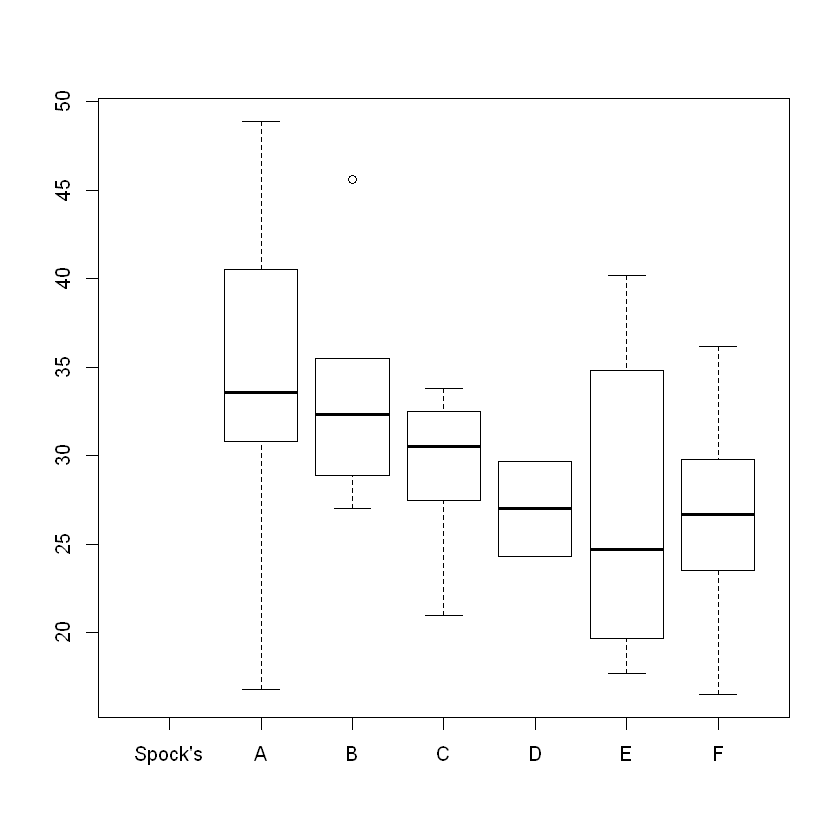

In [29]:
others = subset(jury, judge != "Spock's") 
boxplot(others$Percent~others$Judge, data=others)

In [33]:
summary(aov(others$Percent~others$Judge))

             Df Sum Sq Mean Sq F value Pr(>F)
others$Judge  5  326.5   65.29   1.218  0.324
Residuals    31 1661.3   53.59               

##### Rule of thumb
Not a formal way, not a quick check whether equal variance

In [35]:
sss <- with(others, tapply(others$Percent, others$Judge, sd))
sss

Spock's         A         B         C         D         E         F 
       NA 11.941818  6.582223  4.592929  3.818378  9.010142  5.968878

In [53]:
max(sss, na.rm=T)

[1] 11.94182

In [38]:
min(sss, na.rm=T)

[1] 3.818378

In [39]:
max(sss, na.rm=T) / min(sss, na.rm=T) > 2

[1] TRUE

In [41]:
bartlett.test(others$Percent, others$Judge)


	Bartlett test of homogeneity of variances

data:  others$Percent and others$Judge
Bartlett's K-squared = 6.3125, df = 5, p-value = 0.277


The small p-value may due to the uneven and small group sizes

#### Compare all 7 judges

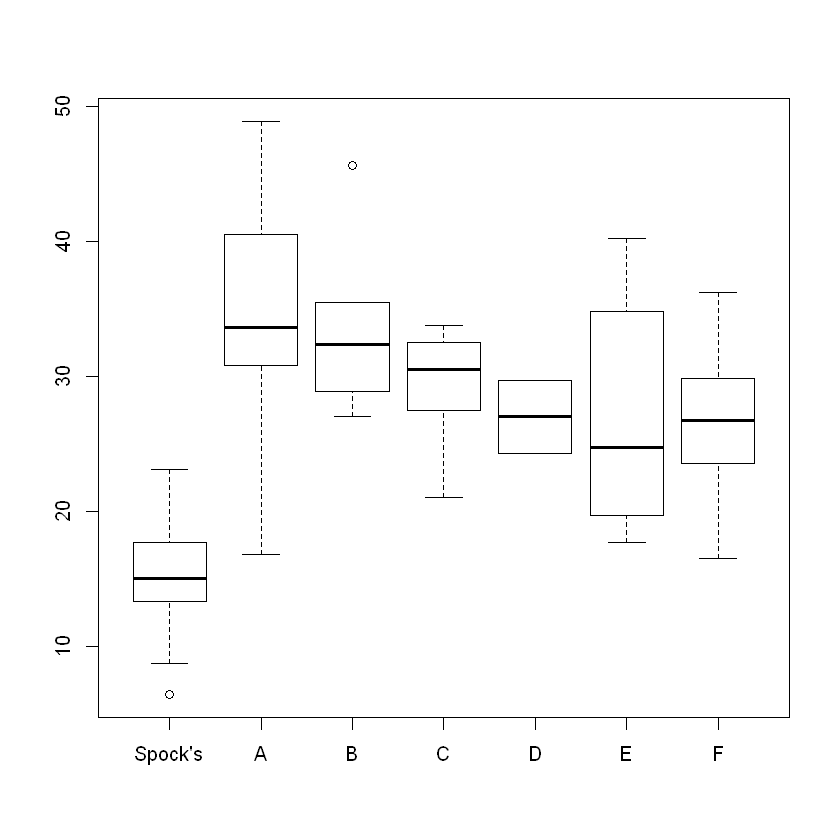

In [43]:
boxplot(percent~judge)

In [44]:
summary(aov(percent~judge))

            Df Sum Sq Mean Sq F value  Pr(>F)    
judge        6   1927   321.2   6.718 6.1e-05 ***
Residuals   39   1864    47.8                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [45]:
summary(lm(percent~judge))


Call:
lm(formula = percent ~ judge)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.320  -4.367  -0.250   3.319  14.780 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   14.622      2.305   6.344 1.72e-07 ***
judgeA        19.498      3.857   5.056 1.05e-05 ***
judgeB        18.994      3.644   5.212 6.39e-06 ***
judgeC        14.478      3.259   4.442 7.15e-05 ***
judgeD        12.378      5.405   2.290 0.027513 *  
judgeE        12.344      3.644   3.388 0.001623 ** 
judgeF        12.178      3.259   3.736 0.000597 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.914 on 39 degrees of freedom
Multiple R-squared:  0.5083,	Adjusted R-squared:  0.4326 
F-statistic: 6.718 on 6 and 39 DF,  p-value: 6.096e-05


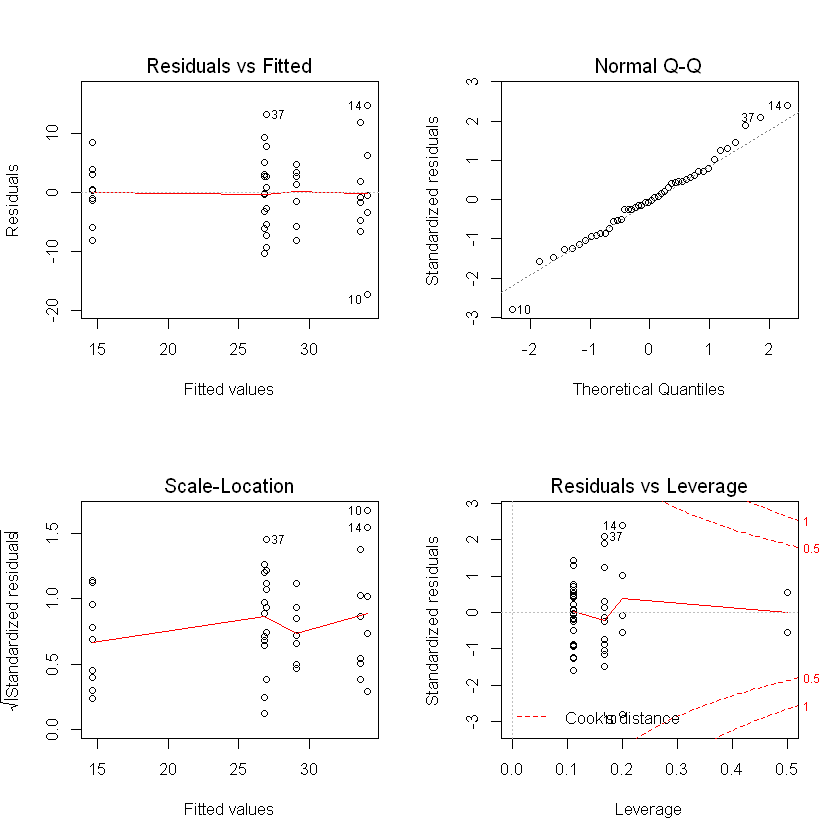

In [59]:
par(mfrow=c(2,2))
plot(lm(percent~judge))

In [55]:
ssa = with(jury, tapply(percent,judge,sd))
ssa

Spock's         A         B         C         D         E         F 
 5.038794 11.941818  6.582223  4.592929  3.818378  9.010142  5.968878

In [56]:
max(ssa) / min(ssa) > 2

[1] TRUE

In [57]:
bartlett.test(percent~judge)


	Bartlett test of homogeneity of variances

data:  percent by judge
Bartlett's K-squared = 7.7582, df = 6, p-value = 0.2564


- Residual vs Fitted: No obvious pattern, assume equal variance (also by rule of thumb and Bartlett)
- Normal Q-Q: overall OK
- Outliers: see Residual vs leverage, not influential point. 